In [447]:
import cv2
import numpy as np
from skimage import feature
from matplotlib import pyplot as plt

def clip(i):
    return np.clip(i, 0, 1)

def show(A): 
    plt.imshow(cv2.cvtColor(A, cv2.COLOR_BGR2RGB) * 255)
    

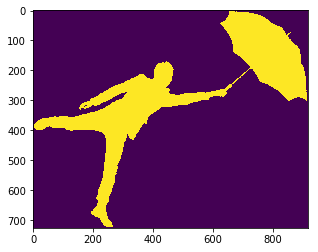

In [242]:
bear = cv2.imread('bear.pbm', cv2.IMREAD_GRAYSCALE)
skeleton = cv2.imread('bear-skeleton-a.pbm', cv2.IMREAD_GRAYSCALE)/255
car = cv2.imread('car.pbm', cv2.IMREAD_GRAYSCALE)
man = cv2.imread('umbrella.pbm', cv2.IMREAD_GRAYSCALE)

plt.imshow(man * 255)

True

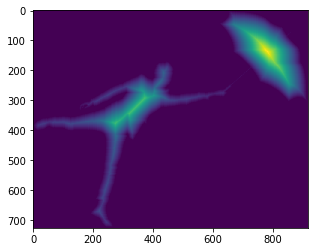

In [246]:
dist = cv2.distanceTransform(bear, cv2.DIST_L1, 3)
card = cv2.distanceTransform(car, cv2.DIST_L1, 3)
mand = cv2.distanceTransform(man, cv2.DIST_L1, 3)

plt.imshow(mand * 255)

cv2.imwrite('beard.jpg',  dist)
cv2.imwrite('umbd.jpg',  mand)
cv2.imwrite('card.jpg',  card)

In [190]:
def findendpoints(A, n):
    (x, y) = A.shape
    crds = []
    for i in (range(x - 1)):
        for j in (range(y - 1)):
            tot = A[i + 1][j + 1] + A[i][j + 1] + A[i + 1][j] + A[i - 1][j - 1] + A[i - 1][j] + A[i][j - 1] + A[i + 1][j - 1] + A[i - 1][j + 1]
            if tot >= n and tot <= n and A[i][j] == 1:
                crds = crds + [(i, j)]
    return crds

bearendpoints = findendpoints(skeleton, 1)

print(bearendpoints)
    

[(69, 286), (95, 326), (196, 39), (196, 250), (200, 166), (200, 205)]


2.0
3.0
2.0
2.0
3.0


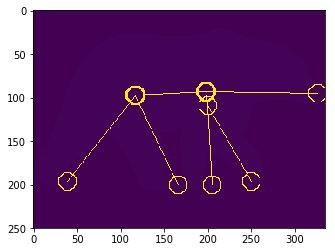

In [232]:
skeleton = cv2.imread('bear-skeleton-a.pbm', cv2.IMREAD_GRAYSCALE)/255
skeleton[69][286] = 0
skeleton[70][285] = 0

bearendpoints = findendpoints(skeleton, 1)


def traverseimage(A, pts):
    cp = np.array(A, copy=True)
    points = pts
    crossings = pts
    (x, y) = A.shape
    crds = []
    while (len(points) > 0):
        start = points[len(points) - 1]
        points.pop(len(points) - 1)
        p = start
        work = True
        while (work):
            (i, j) = p
            cp[i][j] = 0
            tl = cp[i - 1][j - 1]
            t = cp[i][j - 1]
            tr = cp[i + 1][j - 1]
            l = cp[i - 1][j]
            bl = cp[i - 1][j + 1]
            b = cp[i][j + 1]
            br = cp[i + 1][j + 1]
            r = cp[i + 1][j]
            tot = tl + t + tr + l + bl + b + br + r
            if tot > 1 and start != p:
                work = False
                crds = crds + [((start), (p))]
                crossings = crossings + [p]
                for i in range(0, np.int64(tot)):
                    points = points + [p]
            elif tot == 0:
                work=False
                crds = crds + [((start), (p))]
            else:
                if tl == 1: p = (i - 1, j - 1)
                if t == 1: p = (i, j - 1)
                if tr == 1: p = (i + 1, j - 1)
                if l == 1: p = (i - 1, j)
                if bl == 1: p = (i - 1, j + 1)
                if b == 1: p = (i, j + 1)
                if br == 1: p = (i + 1, j + 1)
                if r == 1: p = (i + 1, j)
            

    return (crds, cp)

(crd, pic) = traverseimage(skeleton, bearendpoints)
cpy = np.array(bear, copy=True)


circles = findendpoints(skeleton, 1) + findendpoints(skeleton, 3) + findendpoints(skeleton, 4)
for (i, j) in crd:
    (y1, x1) = i
    (y2, x2) = j
    cv2.line(cpy, (x1, y1), (x2, y2), (128, 128, 128), 1)
    
for (i, j) in circles:
    cv2.circle(cpy, (j, i), 10, (128, 128, 128), 1, 1)
    
plt.imshow(cpy * 255)
# print (crd, pic)
cv2.imwrite('bearskelly.jpg',  cpy)

skeleton = cv2.imread('bear-skeleton-a.pbm', cv2.IMREAD_GRAYSCALE)/255


2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
3.0


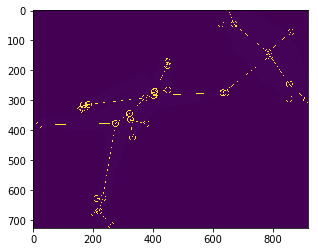

In [233]:
umbr = cv2.imread('umbrella-skeleton-a.pbm', cv2.IMREAD_GRAYSCALE)/255
um = cv2.imread('umbrella.pbm', cv2.IMREAD_GRAYSCALE)

umbrend = findendpoints(umbr, 1)

(crd, pic) = traverseimage(umbr, umbrend)
cpy = np.array(um, copy=True)

circles = findendpoints(umbr, 1) + findendpoints(umbr, 3) + findendpoints(umbr, 4)
for (i, j) in crd:
    (y1, x1) = i
    (y2, x2) = j
    cv2.line(cpy, (x1, y1), (x2, y2), (128, 128, 128), 1)
    
for (i, j) in circles:
    cv2.circle(cpy, (j, i), 10, (128, 128, 128), 1, 1)

cv2.imwrite('umbrskelly.jpg',  cpy)
plt.imshow(cpy * 255)

2.0
2.0
2.0
3.0


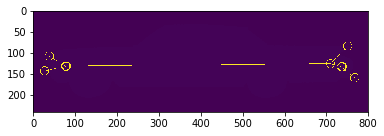

In [234]:
umbr = cv2.imread('car-skeleton-a.pbm', cv2.IMREAD_GRAYSCALE)/255
um = cv2.imread('car.pbm', cv2.IMREAD_GRAYSCALE)

umbrend = findendpoints(umbr, 1)

(crd, pic) = traverseimage(umbr, umbrend)
cpy = np.array(um, copy=True)

circles = findendpoints(umbr, 1) + findendpoints(umbr, 3) + findendpoints(umbr, 4)
for (i, j) in crd:
    (y1, x1) = i
    (y2, x2) = j
    cv2.line(cpy, (x1, y1), (x2, y2), (128, 128, 128), 1)
    
for (i, j) in circles:
    cv2.circle(cpy, (j, i), 10, (128, 128, 128), 1, 1)

cv2.imwrite('carskelly.jpg',  cpy)
plt.imshow(cpy * 255)


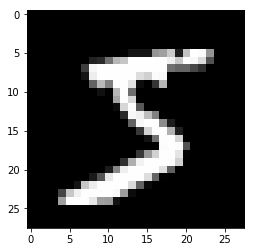

(50000, 784) (10000, 784) (10000, 784)
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


In [25]:
#! /usr/bin/env python3

import pickle
import gzip
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import cv2

with gzip.open('mnist.pkl.gz', 'rb') as fs:
    train_set, valid_set, test_set = pickle.load(fs, encoding='latin1')

train_x, train_y = train_set
valid_x, valid_y = valid_set
test_x,  test_y  = test_set

plt.imshow(train_x[0].reshape((28, 28)), cmap=cm.Greys_r)
plt.show()

print(train_x.shape, valid_x.shape, test_x.shape)
print(train_y[0:20])



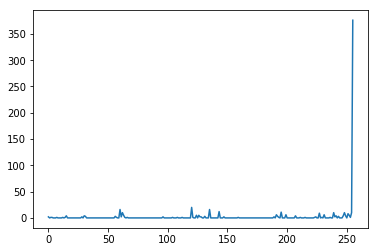

In [542]:
def lbp(A):
    cp = np.array(A, copy=True)
    for j in range(1, 27):
        for i in range(1, 27):
            v = A[i][j]
            tl = (1 if v >= A[i - 1][j - 1] else 0) * 1
            t = (1 if v >= A[i - 1][j] else 0) * 2
            tr = (1 if v >= A[i - 1][j + 1] else 0) * 4
            r = (1 if v >= A[i][j + 1] else 0) * 8
            br = (1 if v >= A[i + 1][j + 1] else 0) * 16
            b = (1 if v >= A[i + 1][j] else 0) * 32
            bl = (1 if v >= A[i + 1][j - 1] else 0) * 64
            l = (1 if v >= A[i][j - 1] else 0) * 128
            to = tl + t + tr + r + br + b + bl + l
            cp[i][j] = to
    return cp

def histogram(A):
    res = np.zeros(256)
    for j in range(2, 27):
        for i in range(2, 27):
            res[np.int64(A[i][j])] = 1 + res[np.int64(A[i][j])]
    return res

lb = lbp(np.array(train_x[555]).reshape(28, 28))
hi = histogram(lb)
plt.plot(hi)
# plt.savefig('histogram.png')
cv2.imwrite('lbp4.jpg',  lb)
plt.show()

In [293]:
a = np.array([[1,2,3],[0,-1,-2], [-4,-5,-6]])
print (a)

for i in range(0, 3):
    for j in range(0, 3):
        print (a[i][j])
        
print(train_x)


[[ 1  2  3]
 [ 0 -1 -2]
 [-4 -5 -6]]
1
2
3
0
-1
-2
-4
-5
-6
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [387]:
data = [0] * 50000

for i in range(0, 50000):
    el = train_x[i].reshape(28, 28)
    data[i] = lbp(el).flatten()


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [421]:

daat = np.array(data, np.float32)
print(daat.shape, train_x.shape)

knn = cv2.ml.KNearest_create()
knn.train(daat[0:1000], cv2.ml.ROW_SAMPLE, np.array((train_y[0:1000]) , np.float32))


(50000, 784) (50000, 784)


True

{0: 84, 1: 102, 2: 93, 3: 82, 4: 94, 5: 87, 6: 83, 7: 107, 8: 79, 9: 89}


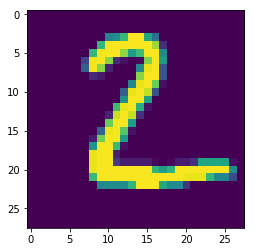

In [415]:

unique, counts = np.unique(train_y[100:1000], return_counts=True)
print(dict(zip(unique, counts)))
plt.imshow(test_x[1].reshape(28,28))

In [439]:
ret, results, neighbours ,dist = knn.findNearest(test_x[0:10], 450)
print(knn)
print(ret, results, neighbours, dist)

<ml_KNearest 0x139d8f410>
1.0 [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]] [[1. 1. 1. ... 9. 7. 3.]
 [1. 1. 1. ... 4. 9. 3.]
 [1. 1. 1. ... 3. 9. 2.]
 ...
 [1. 1. 1. ... 9. 4. 7.]
 [1. 1. 1. ... 9. 3. 2.]
 [1. 1. 1. ... 9. 3. 4.]] [[1036598.2  1238738.1  1268158.5  ... 2945896.   2948308.   2948809.  ]
 [1036195.3  1237253.5  1269294.2  ... 2945672.2  2946585.5  2946951.8 ]
 [1037187.2  1240807.9  1268865.5  ... 2951194.5  2951455.8  2952768.5 ]
 ...
 [1037383.75 1239892.   1269408.4  ... 2944674.5  2945787.5  2949504.8 ]
 [1034782.1  1236003.1  1265729.9  ... 2943321.5  2943473.5  2943677.5 ]
 [1032959.75 1236735.   1263987.4  ... 2940242.8  2940599.2  2940987.8 ]]


In [620]:
dete = [0] * 4000

for i in range(0, 4000):
    el = train_x[i].reshape(28, 28) / 255
    dete[i] = lbp(el).flatten()



In [621]:
daata = np.array(dete, np.float32)
knn = cv2.ml.KNearest_create()
knn.train(daata, cv2.ml.ROW_SAMPLE, np.array((train_y[0:4000]) , np.float32))


True

In [624]:
ret, results, neighbours, dist = knn.findNearest(train_x[0:1000], 3)

corr = 0
for i in range(0, (len(results) - 1)):
    if results[i] == train_y[i]:
        corr += 1
        
cnt = 0
for i in range(len(test_y)):
    if test_y[i] == valid_y[i]:
        cnt += 1 
    
print(cnt)
print (corr / len(results), (corr, len(results)))


1014
0.097 (97, 1000)


In [619]:
print(dete[0])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.   0.
   0. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.   0.
   0. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.   0.
   0. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 239. 207. 143.
 143. 143. 143. 143. 143. 143. 143. 143. 143. 159. 191. 255. 255.   0.
   0. 255. 255. 255. 255. 255. 255. 239. 207. 143. 143. 135. 135. 143.
 143. 135. 135. 135. 159.   7. 135. 255. 127.  63.  63. 255. 255.   0.
   0. 255. 255. 255. 255. 255. 239. 199. 135. 135. 135. 135. 135. 255.
 255. 255. 255. 255.  63. 118. 251. 121. 124. 124. 126. 255. 255.   0.
   0. 